# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [59]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t', na_values='?')
su_sub = su #get ready for subset

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [60]:
su.head(2)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1.0,1,24,0.0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1.0,1,40,0.0,4973,187,9,0.181818,0.125448,1


In [61]:
# List of Column Names
col = list(su.columns.values) 
print col

['url', 'urlid', 'boilerplate', 'alchemy_category', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news', 'lengthyLinkDomain', 'linkwordscore', 'news_front_page', 'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio', 'spelling_errors_ratio', 'label']


In [62]:
def def_count_unique(df):
    cols = pd.Series(df.columns.values) #Series of column headers
    
    y = []
    for x in df:
        z = len(np.unique(df[x]))
        y.append(z)
                    
    q = pd.DataFrame(y, index = df.columns.values, columns=["unique_s"])
    r = q.sort_values("unique_s", ascending=False)
    return r.T

b = def_count_unique(su)
b['url']

unique_s    7395
Name: url, dtype: int64

In [63]:
sutypes = su.apply(lambda x: pd.lib.infer_dtype(x.values))

sutypes['url']

'string'

In [64]:
col_a = "unique_count"
col_b = "example"
col_c = "types"

dataDict = pd.DataFrame()

for i,x in enumerate(b): #unique counts dataframe
    dataDict.ix[x, col_a] = b.ix[0,x] #counts
    dataDict.ix[x, col_b] = su.ix[0,x] #original
    dataDict.ix[x, col_c] = sutypes.ix[x,0]
    #print x
dataDict

,unique_count,example,types
url,7395.0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,string
urlid,7395.0,4042,integer
boilerplate,7394.0,"{""title"":""IBM Sees Holographic Calls Air Breat...",string
html_ratio,7376.0,0.245831,floating
alchemy_category_score,7147.0,0.789131,floating
compression_ratio,6453.0,0.443783,floating
frameTagRatio,5911.0,0.0907738,floating
avglinksize,5710.0,2.05556,floating
image_ratio,5418.0,0.00388349,floating
non_markup_alphanum_characters,5301.0,5424,integer


In [65]:
print su_sub['is_news'].value_counts() #Value counts with low values can drop this

1.0    4552
Name: is_news, dtype: int64


In [66]:
print su_sub['news_front_page'].value_counts() #Value counts with low values can drop this

0.0    5853
1.0     294
Name: news_front_page, dtype: int64


In [67]:
print su_sub['lengthyLinkDomain'].value_counts() #Value counts with low values can drop this

1    4883
0    2512
Name: lengthyLinkDomain, dtype: int64


In [68]:
su_sub = su_sub.drop(['url','boilerplate','framebased','is_news'], axis=1) #drop columns for url and boilerplate
su_sub = su_sub.drop(['urlid'], axis=1) #will drop urlid as well, for Categorization
su_sub.head(20)

,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,...,image_ratio,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.000000,0.090774,...,0.003883,1,24,0.0,5424,170,8,0.152941,0.079130,0
1,recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.000000,0.098707,...,0.088652,1,40,0.0,4973,187,9,0.181818,0.125448,1
2,health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.000000,0.072448,...,0.120536,1,55,0.0,2240,258,11,0.166667,0.057613,1
3,health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.000000,0.095861,...,0.035343,0,24,0.0,2737,120,5,0.041667,0.100858,1
4,sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.000000,0.024908,...,0.050473,1,14,0.0,12032,162,10,0.098765,0.082569,0
5,NaN,NaN,119.000000,0.745455,0.581818,0.290909,0.018182,0.434639,0.000000,0.019841,...,0.038636,0,12,NaN,4368,55,3,0.054545,0.087356,0
6,arts_entertainment,0.221110,0.773810,0.215054,0.053763,0.043011,0.043011,0.579596,0.000000,0.039568,...,0.311377,0,21,0.0,1287,93,3,0.548387,0.064327,1
7,NaN,NaN,1.883333,0.719697,0.265152,0.113636,0.015152,0.499348,0.000000,0.026616,...,0.025830,0,5,NaN,27656,132,4,0.068182,0.148551,0
8,NaN,NaN,0.471503,0.190722,0.036082,0.000000,0.000000,0.383199,0.000000,0.021705,...,1.136646,0,17,0.0,2471,194,7,0.644330,0.125000,1
9,NaN,NaN,2.410112,0.469325,0.101227,0.018405,0.003067,0.465859,0.000000,0.012000,...,0.206262,1,14,NaN,11459,326,4,0.236196,0.094412,1


In [69]:
# NULLS ??? 
print su_sub.isnull().sum() #YES THERE ARE...
print su_sub.shape

#Let's group them together, before we drop nulls, so we don't drop info for other columns

#GROUP A: has none of the null columns

su_suba = su_sub.drop(['alchemy_category', 'alchemy_category_score','news_front_page'], axis=1)
su_suba

print su_suba.shape

su_subb = su_sub.dropna()

print su_subb.isnull().sum() #NO THERE AREN'T...
print su_subb.shape
su_subb

alchemy_category                  2342
alchemy_category_score            2342
avglinksize                          0
commonlinkratio_1                    0
commonlinkratio_2                    0
commonlinkratio_3                    0
commonlinkratio_4                    0
compression_ratio                    0
embed_ratio                          0
frameTagRatio                        0
hasDomainLink                        0
html_ratio                           0
image_ratio                          0
lengthyLinkDomain                    0
linkwordscore                        0
news_front_page                   1248
non_markup_alphanum_characters       0
numberOfLinks                        0
numwords_in_url                      0
parametrizedLinkRatio                0
spelling_errors_ratio                0
label                                0
dtype: int64
(7395, 22)
(7395, 19)
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0

,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,...,image_ratio,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.000000,0.090774,...,0.003883,1,24,0.0,5424,170,8,0.152941,0.079130,0
1,recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.000000,0.098707,...,0.088652,1,40,0.0,4973,187,9,0.181818,0.125448,1
2,health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.000000,0.072448,...,0.120536,1,55,0.0,2240,258,11,0.166667,0.057613,1
3,health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.000000,0.095861,...,0.035343,0,24,0.0,2737,120,5,0.041667,0.100858,1
4,sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.000000,0.024908,...,0.050473,1,14,0.0,12032,162,10,0.098765,0.082569,0
6,arts_entertainment,0.221110,0.773810,0.215054,0.053763,0.043011,0.043011,0.579596,0.000000,0.039568,...,0.311377,0,21,0.0,1287,93,3,0.548387,0.064327,1
10,business,0.816604,2.506527,0.637755,0.293367,0.091837,0.048469,0.592322,0.000000,0.056497,...,0.511364,1,53,0.0,4401,392,0,0.160714,0.073684,0
11,sports,0.891560,4.986111,0.640000,0.426667,0.320000,0.293333,0.521064,0.004065,0.162690,...,0.060976,1,40,0.0,2701,75,8,0.186667,0.115385,0
12,health,0.872323,3.056911,0.595588,0.227941,0.044118,0.014706,0.573109,0.000000,0.074576,...,0.084112,1,64,0.0,1062,136,9,0.169118,0.180328,1
14,recreation,0.559991,2.299492,0.547414,0.206897,0.056034,0.017241,0.473965,0.000000,0.078431,...,0.036424,1,37,0.0,3610,232,11,0.215517,0.080205,0


In [70]:
#Convert to String Floats to Floats - can only do this for one type, need to take out '?' in floats ahead of time

su_subb['news_front_page'] = su_subb['news_front_page'].map(lambda x: float(x))
su_subb['alchemy_category_score'] = su_subb['alchemy_category_score'].map(lambda x: float(x))

su_subb

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,...,image_ratio,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.000000,0.090774,...,0.003883,1,24,0.0,5424,170,8,0.152941,0.079130,0
1,recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.000000,0.098707,...,0.088652,1,40,0.0,4973,187,9,0.181818,0.125448,1
2,health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.000000,0.072448,...,0.120536,1,55,0.0,2240,258,11,0.166667,0.057613,1
3,health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.000000,0.095861,...,0.035343,0,24,0.0,2737,120,5,0.041667,0.100858,1
4,sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.000000,0.024908,...,0.050473,1,14,0.0,12032,162,10,0.098765,0.082569,0
6,arts_entertainment,0.221110,0.773810,0.215054,0.053763,0.043011,0.043011,0.579596,0.000000,0.039568,...,0.311377,0,21,0.0,1287,93,3,0.548387,0.064327,1
10,business,0.816604,2.506527,0.637755,0.293367,0.091837,0.048469,0.592322,0.000000,0.056497,...,0.511364,1,53,0.0,4401,392,0,0.160714,0.073684,0
11,sports,0.891560,4.986111,0.640000,0.426667,0.320000,0.293333,0.521064,0.004065,0.162690,...,0.060976,1,40,0.0,2701,75,8,0.186667,0.115385,0
12,health,0.872323,3.056911,0.595588,0.227941,0.044118,0.014706,0.573109,0.000000,0.074576,...,0.084112,1,64,0.0,1062,136,9,0.169118,0.180328,1
14,recreation,0.559991,2.299492,0.547414,0.206897,0.056034,0.017241,0.473965,0.000000,0.078431,...,0.036424,1,37,0.0,3610,232,11,0.215517,0.080205,0


In [71]:
sutypes2 = su_sub.apply(lambda x: pd.lib.infer_dtype(x.values))
sutypes2 #GOOD ALL IS NUMBERS except for alchemy_category

alchemy_category                     mixed
alchemy_category_score            floating
avglinksize                       floating
commonlinkratio_1                 floating
commonlinkratio_2                 floating
commonlinkratio_3                 floating
commonlinkratio_4                 floating
compression_ratio                 floating
embed_ratio                       floating
frameTagRatio                     floating
hasDomainLink                      integer
html_ratio                        floating
image_ratio                       floating
lengthyLinkDomain                  integer
linkwordscore                      integer
news_front_page                   floating
non_markup_alphanum_characters     integer
numberOfLinks                      integer
numwords_in_url                    integer
parametrizedLinkRatio             floating
spelling_errors_ratio             floating
label                              integer
dtype: object

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [72]:
#alchemy_category is Categorical

# Get the non-target cols with a simple list comprehension, "label" is TARGET
non_target_cols_a = [c for c in su_suba.columns if c not in ["label"]]

# Use some string adding and joining to make the simple model formula:
formula_za = 'label' + ' ~ ' + ' + '.join(non_target_cols_a) + ' - 1'
formula_za = str(formula_za)

print formula_za


label ~ avglinksize + commonlinkratio_1 + commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink + html_ratio + image_ratio + lengthyLinkDomain + linkwordscore + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio + spelling_errors_ratio - 1


### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [73]:
import statsmodels.formula.api as smf

logreg_a = smf.logit(formula_za, data = su_suba)
logreg_results_a = logreg_a.fit()


Optimization terminated successfully.
         Current function value: 0.653858
         Iterations 5


In [74]:
print logreg_results_a.summary()

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7377
Method:                           MLE   Df Model:                           17
Date:                Tue, 17 May 2016   Pseudo R-squ.:                 0.05620
Time:                        06:11:23   Log-Likelihood:                -4835.3
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                1.850e-111
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
avglinksize                        0.0014      0.003      0.478      0.633        -0.004     0.007
commonlinkratio_1                  0.9679      0.210      4.606      0.

In [75]:

ya = su_suba['label']
Xa = su_suba.drop(['label'], axis = 1)

In [76]:

su_suba.corr()


,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
avglinksize,1.000000,0.120467,0.161769,0.174554,0.134527,-0.003578,0.005254,-0.049270,-0.002046,0.018974,-0.003002,0.020852,0.122550,-0.010982,0.000360,-0.033890,0.006089,0.035393,0.006172
commonlinkratio_1,0.120467,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,0.006790,-0.201501,-0.064435,0.421284,0.257200,0.193914,0.317293,0.144354,-0.078026,-0.035019,0.083364
commonlinkratio_2,0.161769,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,0.000263,-0.159702,-0.044663,0.398817,0.257594,0.177785,0.311492,0.096940,-0.079485,-0.027888,0.083488
commonlinkratio_3,0.174554,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.031097,-0.133370,-0.050357,0.363159,0.109654,0.264022,0.283924,0.049203,-0.008652,-0.008599,0.105964
commonlinkratio_4,0.134527,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,-0.052519,-0.136561,-0.038071,0.287159,0.059223,0.162883,0.233898,0.026384,0.036387,-0.013507,0.080464
compression_ratio,-0.003578,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,0.027657,0.106335,-0.188976,-0.090325,0.146470,-0.064163,-0.055388,-0.042614,-0.033772,0.364122,-0.059737
embed_ratio,0.005254,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,-0.026473,-0.090938,0.183808,0.075322,-0.108476,0.046484,0.042942,0.043343,0.037361,-0.342206,0.039536
frameTagRatio,-0.049270,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,0.010193,0.384937,-0.088847,-0.196673,0.158874,-0.303682,-0.362491,0.049330,-0.094557,0.033663,-0.187762
hasDomainLink,-0.002046,0.006790,0.000263,-0.031097,-0.052519,0.027657,-0.026473,0.010193,1.000000,0.009665,-0.003890,0.008579,0.022583,-0.017361,0.013678,0.058085,0.051330,0.008718,-0.004863
html_ratio,0.018974,-0.201501,-0.159702,-0.133370,-0.136561,0.106335,-0.090938,0.384937,0.009665,1.000000,-0.172924,-0.215809,-0.141363,-0.136550,-0.455636,-0.042001,-0.183350,0.013860,-0.051149


### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [77]:
su_subb.columns.values

array(['alchemy_category', 'alchemy_category_score', 'avglinksize',
       'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3',
       'commonlinkratio_4', 'compression_ratio', 'embed_ratio',
       'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks',
       'numwords_in_url', 'parametrizedLinkRatio', 'spelling_errors_ratio',
       'label'], dtype=object)

In [78]:
import statsmodels.formula.api as smf
su_subc = pd.DataFrame()
su_subc = su_subb
su_subc.head(1)

,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,...,image_ratio,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0.090774,...,0.003883,1,24,0.0,5424,170,8,0.152941,0.07913,0


In [79]:
#import statsmodels.formula.api as smf

yc = su_subc['label']
Xc = su_subc.drop(['label'], axis = 1)


non_target_cols_c = [c for c in Xc.columns if c not in ["label", "alchemy_category"]]

# Use some string adding and joining to make the simple model formula:
formula_zc = 'label' + ' ~ C(alchemy_category) + ' + ' + '.join(non_target_cols_c) + ' - 1'
formula_zc = str(formula_zc)

logreg_c = smf.logit(formula_zc, data = su_subc)
logreg_results_c = logreg_c.fit()

print formula_zc


         Current function value: 0.590719
         Iterations: 35
label ~ C(alchemy_category) + alchemy_category_score + avglinksize + commonlinkratio_1 + commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink + html_ratio + image_ratio + lengthyLinkDomain + linkwordscore + news_front_page + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio + spelling_errors_ratio - 1


/Users/noriogura/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [80]:
print logreg_results_c.summary()

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 4824
Model:                          Logit   Df Residuals:                     4791
Method:                           MLE   Df Model:                           32
Date:                Tue, 17 May 2016   Pseudo R-squ.:                  0.1465
Time:                        06:11:28   Log-Likelihood:                -2849.6
converged:                      False   LL-Null:                       -3338.9
                                        LLR p-value:                5.616e-185
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
C(alchemy_category)[arts_entertainment]     1.0543      0.273      3.859      0.000         0.519     1.590
C(alchemy_category)[business]               

In [81]:
#baseline => 51% vs 59% from model above
baseline = ya.value_counts() / len(ya)
baseline

1    0.51332
0    0.48668
Name: label, dtype: float64

## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [111]:
import patsy
from patsy import dmatrices

yb, Xb = dmatrices(formula_zc, data = su_subc, return_type='dataframe')

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

# Better estimate of training accuracy of out of sample performance
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    Xb, yb, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, y_train)
print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, y_test)     
print accuracy_score(y_test, predictions)

#66% is a better fit with cross validation

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: 0.661658031088
0.661658031088


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
#normalize predictor matrix- doesn't really change anything...

nc = [x for x in Xb.columns]

yb, Xb = dmatrices(formula_zc, data = su_subc, return_type='dataframe')

#NORMALIZE
Xb.ix[:, nc] = (Xb.ix[:, nc] - Xb.ix[:, nc].mean()) / Xb.ix[:, nc].std()

# Better estimate of training accuracy of out of sample performance
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    Xb, yb, test_size=0.4, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, y_train)
print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, y_test)     
print accuracy_score(y_test, predictions)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: 0.687046632124
0.687046632124


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

logreg = LogisticRegression()
model = logreg.fit(Xb, yb)

ya = su_suba['label']
Xa = su_suba.drop(['label'], axis = 1)

scores = cross_val_score(logreg, Xa, ya, cv=5)
print scores.mean()
print scores.std()

#lower score before cv, 0.69, may have had overffiting before cross validation

/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.610279520202
0.00692960061803


In [114]:
from statsmodels.discrete.discrete_model import Logit
from patsy import dmatrices

y, X = dmatrices(formula_za, data = su_suba)
Y = np.ravel(y)

logreg_a = smf.logit(formula_za, data = su_suba)
logreg_results_a = logreg_a.fit()

Optimization terminated successfully.
         Current function value: 0.653858
         Iterations 5


## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [115]:
#Grid Search with Ridge Regularization
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

ridgemodel = Ridge() #Ridge

#Prepare a Range of Alpha Values to Test
alphas = np.array([1000,100, 10, 1,0.1,0.01,0.001,0.0001,0])

estim_ridge = GridSearchCV(estimator=ridgemodel, param_grid=dict(alpha=alphas)) #Ridge

In [116]:
estim_ridge.fit(Xb, yb)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+03,   1.00000e+02,   1.00000e+01,   1.00000e+00,
         1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [117]:
print(estim_ridge)

#Summarize the Results of the Grid Search
print(estim_ridge.best_score_)
print(estim_ridge.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+03,   1.00000e+02,   1.00000e+01,   1.00000e+00,
         1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.172935743591
100.0


In [118]:
grid = estim_ridge.fit(Xb,yb)
grid.best_params_

{'alpha': 100.0}

In [119]:
grid.grid_scores_

[mean: 0.16859, std: 0.01345, params: {'alpha': 1000.0},
 mean: 0.17294, std: 0.01702, params: {'alpha': 100.0},
 mean: 0.17233, std: 0.01739, params: {'alpha': 10.0},
 mean: 0.17224, std: 0.01742, params: {'alpha': 1.0},
 mean: 0.17223, std: 0.01742, params: {'alpha': 0.10000000000000001},
 mean: 0.17223, std: 0.01742, params: {'alpha': 0.01},
 mean: 0.17223, std: 0.01742, params: {'alpha': 0.001},
 mean: 0.17223, std: 0.01742, params: {'alpha': 0.0001},
 mean: 0.17137, std: 0.01743, params: {'alpha': 0.0}]

In [147]:
nc = [x for x in Xb.columns]

yb, Xb = dmatrices(formula_zc, data = su_subc, return_type='dataframe')

Xb.ix[:, nc] = (Xb.ix[:, nc] - Xb.ix[:, nc].mean()) / Xb.ix[:, nc].std()

from sklearn.linear_model import LogisticRegressionCV

lassomodel = LogisticRegressionCV(solver='liblinear', refit=True, penalty='l2', cv=5, scoring='average_precision') # Lasso


#Prepare a Range of Alpha Values to Test
alphas = np.array([1000,100, 10, 1,0.1,0.01,0.001,0.0001,0])

search_parameters = {
    "penalty":             ['l1','l2'],   # Used to specify the norm used in the penalization.
    "Cs":                   [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5]  # Regularization paramter -- totally out of bounds but we will try it
}

yb= su_subc['label']

estim_lasso = GridSearchCV(estimator=lassomodel, param_grid=dict(Cs=alphas)) #Lasso
#estim_lasso = GridSearchCV(estimator=lassomodel, search_parameters) #Lasso
grid = estim_lasso.fit(Xa,ya)

TypeError: object of type 'numpy.float64' has no len()

In [140]:
logistic = LogisticRegression() #Normal logistic regression

search_parameters = {
    "penalty":             ['l1','l2'],   # Used to specify the norm used in the penalization.
    "C":                   [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5],  # Regularization paramter -- totally out of bounds but we will try it
    #"dual":                [True, False], # Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features
    "fit_intercept":       [False, True], # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    "class_weight":        [None, "balanced", "auto"], # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    "intercept_scaling":   [2, 1],        # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. 
    "solver":              ['liblinear'],
    "warm_start":          [False, True]
}

estim_log = GridSearchCV(logistic, search_parameters) #Logistic
grid = estim_log.fit(Xb, yb)

/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)
/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17

In [96]:
grid.grid_scores_

[mean: 0.51427, std: 0.00138, params: {'warm_start': False, 'C': 0.0001, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None},
 mean: 0.51427, std: 0.00138, params: {'warm_start': True, 'C': 0.0001, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None},
 mean: 0.59162, std: 0.00580, params: {'warm_start': False, 'C': 0.0001, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None},
 mean: 0.59162, std: 0.00580, params: {'warm_start': True, 'C': 0.0001, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None},
 mean: 0.51427, std: 0.00138, params: {'warm_start': False, 'C': 0.0001, 'intercept_scaling': 1, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None},
 mean: 0.51427, std: 0.00138, params: {'warm_start': True, 'C': 0.0001, 'intercept

In [141]:
print(estim_log.best_score_)
print(estim_log.best_estimator_)
print(estim_log.best_params_)


0.691749585406
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=2, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'warm_start': False, 'C': 0.5, 'intercept_scaling': 2, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None}


## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
# 10-fold cross-validation with K=5 for KNN neighbors parameter

knn = KNeighborsClassifier(n_neighbors =5)
scores = cross_val_score(knn, Xb, yb, cv=10, scoring='accuracy')
#estimate of out of sample accuracy
print knn
print scores
print scores.mean()

knn.fit(Xb,yb)
y_pred = knn.predict(Xb)
print metrics.accuracy_score(yb, y_pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[ 0.67701863  0.69151139  0.67080745  0.68944099  0.65560166  0.68879668
  0.68257261  0.67427386  0.67427386  0.67842324]
0.678272037662
0.779021558872


In [151]:
#Range of neighbors 1-30
k_range = range(1,31)

param_grid = dict(n_neighbors=k_range)
param_grid

#instantiate grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

#fit grid with data
grid.fit(Xb,yb)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

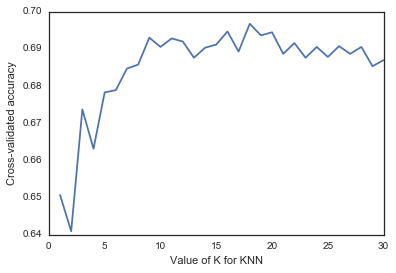

In [152]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [153]:
#Examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.696724709784
{'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


In [159]:
# train model using all data and best known parameters
knn = KNeighborsClassifier(n_neighbors =18)
knn.fit(Xb,yb)


predictions = knn.predict(Xb)

scores = cross_val_score(knn, Xb, yb, cv=10, scoring='accuracy')
scores

#fit a model on the training data and test on the testing data
model = logreg.fit(Xb, yb)
print model
predictions = logreg.predict(Xb)

print "Score:", model.score(Xb, yb)     
print accuracy_score(yb, predictions)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: 0.695273631841
0.695273631841


## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Choose your target category, create the Y vector, and check the fraction of instances

---

In [73]:
#New target category will be "news_front_page"
su_sub['news_front_page'].value_counts() #Value counts with low values can drop this

0.0    5853
1.0     294
Name: news_front_page, dtype: int64

In [169]:
yz = su_subc['news_front_page']
Xz = su_subc.drop(['news_front_page'], axis=1)

#print xz.head(1)
print yz


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
6       0.0
10      0.0
11      0.0
12      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
25      0.0
26      1.0
27      0.0
30      0.0
31      0.0
33      0.0
34      0.0
37      0.0
40      0.0
41      1.0
43      0.0
45      0.0
       ... 
7349    0.0
7351    0.0
7352    0.0
7353    0.0
7354    0.0
7355    0.0
7358    0.0
7359    0.0
7360    0.0
7362    0.0
7364    0.0
7370    0.0
7372    0.0
7373    1.0
7374    0.0
7375    1.0
7376    0.0
7377    0.0
7378    0.0
7379    0.0
7381    0.0
7382    0.0
7383    0.0
7386    0.0
7387    0.0
7388    0.0
7390    0.0
7391    0.0
7392    0.0
7393    1.0
Name: news_front_page, dtype: float64


### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

In [172]:
import patsy
from patsy import dmatrices

non_target_cols_z = [c for c in Xz.columns if c not in ["news_front_page", "alchemy_category"]]

# Use some string adding and joining to make the simple model formula:
formula_interactions = 'news_front_page' + ' ~ (C(alchemy_category) + ' + ' + '.join(non_target_cols_c) + ')**2 - 1'
formula_interactions = str(formula_interactions)
print formula_interactions


news_front_page ~ (C(alchemy_category) + alchemy_category_score + avglinksize + commonlinkratio_1 + commonlinkratio_2 + commonlinkratio_3 + commonlinkratio_4 + compression_ratio + embed_ratio + frameTagRatio + hasDomainLink + html_ratio + image_ratio + lengthyLinkDomain + linkwordscore + news_front_page + non_markup_alphanum_characters + numberOfLinks + numwords_in_url + parametrizedLinkRatio + spelling_errors_ratio)**2 - 1


### 7.3 Normalize the predictor matrix columns

---

In [175]:
import patsy
from patsy import dmatrices

yz, Xz = dmatrices(formula_interactions, data = su_subc, return_type='dataframe')
yz = su_subc['news_front_page']

#NORMALIZE
Xz.ix[:, nc] = (Xz.ix[:, nc] - Xz.ix[:, nc].mean()) / Xz.ix[:, nc].std()
Xz[0:10]

,C(alchemy_category)[arts_entertainment],C(alchemy_category)[business],C(alchemy_category)[computer_internet],C(alchemy_category)[culture_politics],C(alchemy_category)[gaming],C(alchemy_category)[health],C(alchemy_category)[law_crime],C(alchemy_category)[recreation],C(alchemy_category)[religion],C(alchemy_category)[science_technology],...,non_markup_alphanum_characters:numberOfLinks,non_markup_alphanum_characters:numwords_in_url,non_markup_alphanum_characters:parametrizedLinkRatio,non_markup_alphanum_characters:spelling_errors_ratio,numberOfLinks:numwords_in_url,numberOfLinks:parametrizedLinkRatio,numberOfLinks:spelling_errors_ratio,numwords_in_url:parametrizedLinkRatio,numwords_in_url:spelling_errors_ratio,parametrizedLinkRatio:spelling_errors_ratio
0,-0.477882,2.169769,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,-0.568993,-0.120449,-0.244897,...,922080.0,43392.0,829.552939,429.198815,1360.0,26.0,13.452028,1.223529,0.633037,0.012102
1,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,1.757127,-0.120449,-0.244897,...,929951.0,44757.0,904.181819,623.853048,1683.0,34.0,23.458781,1.636364,1.129032,0.022809
2,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,3.025540,-0.075016,-0.568993,-0.120449,-0.244897,...,577920.0,24640.0,373.333334,129.053499,2838.0,43.0,14.864198,1.833333,0.633745,0.009602
3,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,3.025540,-0.075016,-0.568993,-0.120449,-0.244897,...,328440.0,13685.0,114.041668,276.049356,600.0,5.0,12.103004,0.208333,0.504292,0.004202
4,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,-0.568993,-0.120449,-0.244897,...,1949184.0,120320.0,1188.345678,993.467886,1620.0,16.0,13.376147,0.987654,0.825688,0.008155
6,2.092133,-0.460783,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,-0.568993,-0.120449,-0.244897,...,119691.0,3861.0,705.774194,82.789473,279.0,51.0,5.982456,1.645161,0.192982,0.035276
10,-0.477882,2.169769,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,-0.568993,-0.120449,-0.244897,...,1725192.0,0.0,707.303573,324.284213,0.0,63.0,28.884211,0.000000,0.000000,0.011842
11,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,-0.568993,-0.120449,-0.244897,...,202575.0,21608.0,504.186668,311.653845,600.0,14.0,8.653846,1.493333,0.923077,0.021538
12,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,3.025540,-0.075016,-0.568993,-0.120449,-0.244897,...,144432.0,9558.0,179.602941,191.508197,1224.0,23.0,24.524590,1.522059,1.622951,0.030497
14,-0.477882,-0.460783,-0.250552,-0.268744,-0.123944,-0.330451,-0.075016,1.757127,-0.120449,-0.244897,...,837520.0,39710.0,778.017240,289.539249,2552.0,50.0,18.607508,2.370690,0.882253,0.017286


### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

In [176]:
#Ridge fit, new model
estim_ridge.fit(Xz, yz)
print(estim_ridge)

#Summarize the Results of the Grid Search
print(estim_ridge.best_score_)
print(estim_ridge.best_estimator_.alpha)

#Best Alpha 0.001, strong fit model, should cross-validate

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+03,   1.00000e+02,   1.00000e+01,   1.00000e+00,
         1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.999999999995
0.0001


### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

In [177]:
#Lasso doesn't seem to work, will do regular logistic regression - should cross validate

#fit a model on the training data and test on the testing data
model = logreg.fit(Xz, yz)
print model
predictions = logreg.predict(Xz)

print "Score:", model.score(Xz, yz)     
print accuracy_score(yz, predictions)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: 0.998963515755
0.998963515755


In [ ]:
#Better to do false pos, false neg, ROC  to check

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

In [181]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split( Xz, yz, test_size=0.4, random_state=42)

#Fit Log Reg to training data
logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

conmat = np.array(confusion_matrix(y_test, Y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['is_front_page', 'not_front_page'],
                         columns=['predicted_front_page','predicted_not_front_page'])

print(confusion)

# print "Score:", model.score(X_test, y_test)     
# print accuracy_score(y_test, predictions)

                predicted_front_page  predicted_not_front_page
is_front_page                     92                         3
not_front_page                     3                      1832


In [183]:
# Accuracy tells us the percent of houses selling for over and under 200k correctly predicted
print(accuracy_score(y_test, Y_pred))

# Precision tells us how well the classifier avoided misclassifying the over 200k houses
print(precision_score(y_test, Y_pred))

# Recall tells us how well the classifier correctly identified houses as selling for over 200k
print(recall_score(y_test, Y_pred))

#GOOD ACCURACY AND PRECISION

0.99689119171
0.968421052632
0.968421052632


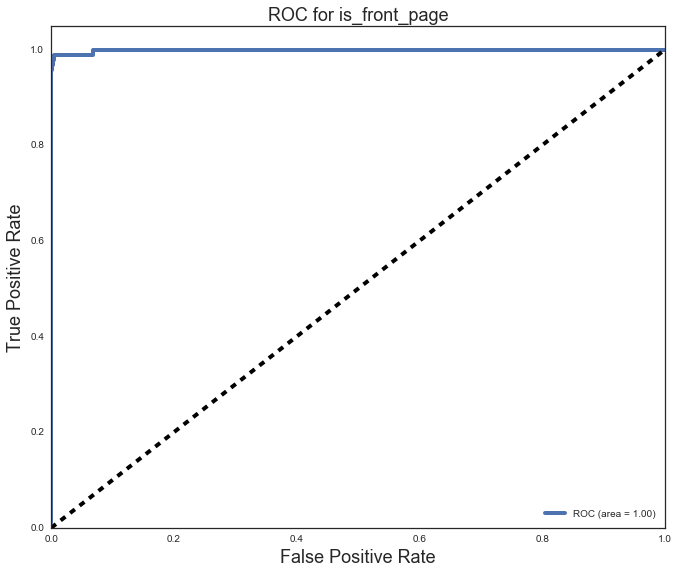

In [187]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for is_front_page', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')

    
Y_score = logreg.decision_function(X_test)
plot_roc(y_test, Y_score)

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [4]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---